In [18]:
# Sumowanie liczb pojedynczej precyzji
import numpy as np
from matplotlib import pyplot as plt
import time

In [19]:
# CONSTANTS, you can modify the x value
x = np.float32(0.53125)
NUMBERS = [x] * 10 ** 7
EXPECTED_VALUE = x * 10 ** 7

In [20]:
def relative_error(x, dx):
    return abs((x - dx)) / x


def absolute_error(x, dx):
    return abs(x - dx)

In [21]:
def sum_normal(array):
    counter = np.float32(0)
    for i in array:
        counter += i
    return counter


def sum_tree(array):
    if (len(array) == 1):
        return array[0]

    len_ = int(len(array) / 2)
    return sum_tree(array[0:len_]) + sum_tree(array[len_:])

In [22]:
# Display plot function
def draw_relative_error_plot(numbers):
    counter = np.float32(0)
    array = []
    for (j, i) in enumerate(numbers):
        counter = counter + i
        if j % 25000 == 0 and j != 0:
            array.append(relative_error(j * x, counter))
    plt.plot(array)
    plt.show()

In [23]:
def print_errors():
    tree_sum = sum_tree(NUMBERS)

    rel_err_tree = relative_error(EXPECTED_VALUE, tree_sum)
    abs_err_tree = absolute_error(EXPECTED_VALUE, tree_sum)
    print("Tree sum: ")
    print(abs_err_tree)
    print(rel_err_tree)
    print("--------------")
    normal_sum = sum_normal(NUMBERS)
    rel_err_normal = relative_error(EXPECTED_VALUE, normal_sum)
    abs_err_normal = absolute_error(EXPECTED_VALUE, normal_sum)
    print("Normal sum: ")
    print(rel_err_normal)
    print(abs_err_normal)

In [24]:
def compare_time():
    start = time.time() * 1000
    sum_normal(NUMBERS)
    end = time.time() * 1000
    normal_time = (end - start).__round__(2)
    print(f"Time for normal sum: {normal_time} milliseconds")
    start = time.time() * 1000
    sum_tree(NUMBERS)
    end = time.time() * 1000
    tree_time = (end - start).__round__(2)
    print(f"Time for tree sum: {tree_time} milliseconds")


In [25]:
print_errors()

Tree sum: 
0.0
0.0
--------------
Normal sum: 
0.05301825882352941
281659.5


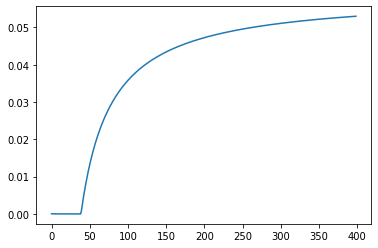

In [26]:
draw_relative_error_plot(NUMBERS)

In [27]:
compare_time()

Time for normal sum: 702.0 milliseconds
Time for tree sum: 7598.0 milliseconds
